In [1]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='password',
    database='naxos_db'
)

query = """
SELECT
    p.name,
    a.release_date,
    a.title AS album_title,
    CASE
        WHEN COUNT(ap.period) = 1 THEN MAX(ap.period)
        ELSE 'mixed'
    END AS period
FROM AlbumRole AS r
JOIN Person AS p ON p.id = r.person_id
JOIN Album AS a ON a.catalogue_no = r.album_catalogue_no
LEFT JOIN AlbumPeriod AS ap ON a.catalogue_no = ap.catalogue_no
WHERE r.role = 'conductor'
    AND a.release_date IS NOT NULL
    AND p.name IN ('Halász, Michael', 'Wildner, Johannes', 'Gunzenhauser, Stephen', 'Wit, Antoni')
GROUP BY a.catalogue_no, a.title, a.release_date, p.name
ORDER BY a.release_date DESC;
"""

df = pd.read_sql(query, connection)
connection.close()
df.head()

C:\Users\jakob\AppData\Local\Temp\ipykernel_12932\4199719658.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,name,release_date,album_title,period
0,"Halász, Michael",2024-05-01,"WAGNER, R.: Great Composers in Words and Music",mixed
1,"Wildner, Johannes",2024-03-01,"SCHUMANN, R.: Great Composers in Words and Music",mixed
2,"Halász, Michael",2024-01-01,"SCHUBERT, F.: Great Composers in Words and Music",mixed
3,"Wit, Antoni",2023-10-01,"PENDERECKI, K.: Symphony No. 6, ""Chinese Song...",Contemporary
4,"Wit, Antoni",2023-08-01,"NOSKOWSKI, Z.: Symphonies Nos. 1 and 2 (Rheinl...",mixed


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])

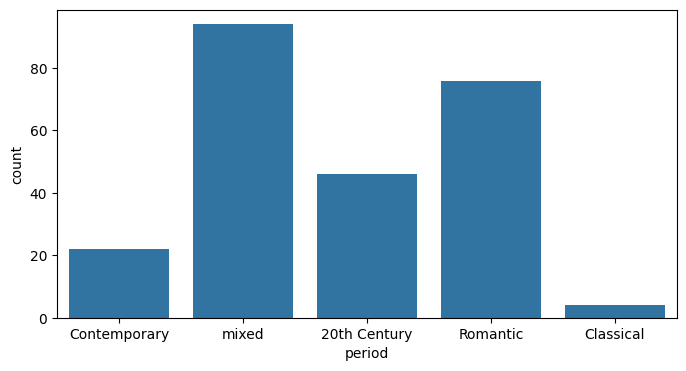

In [36]:
fig = plt.figure(figsize=(8,4))

sns.countplot(
    data=df.query('name == "Wit, Antoni"'),
    x='period',
    legend=False
)

plt.show()

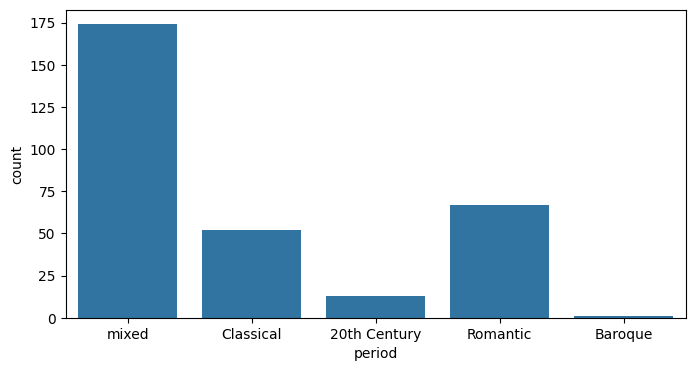

In [37]:
fig = plt.figure(figsize=(8,4))

sns.countplot(
    data=df.query('name == "Halász, Michael"'),
    x='period',
    legend=False
)

plt.show()

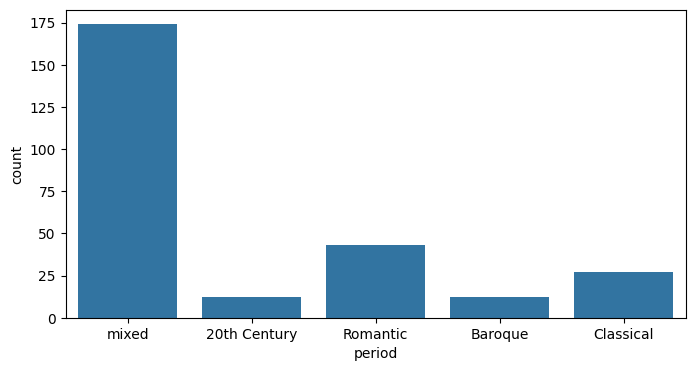

In [39]:
fig = plt.figure(figsize=(8,4))

sns.countplot(
    data=df.query('name == "Gunzenhauser, Stephen"'),
    x='period',
    legend=False
)

plt.show()

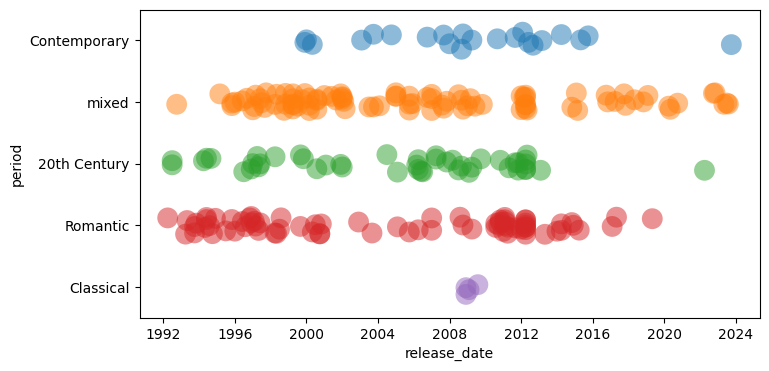

In [4]:
fig = plt.figure(figsize=(8,4))

sns.stripplot(
    data=df.query('name == "Wit, Antoni"'),
    x='release_date',
    y='period',
    hue='period',
    legend=False,
    size=15,
    alpha=0.5,
    jitter=0.15
)

plt.show()

c:\Users\jakob\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jakob\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


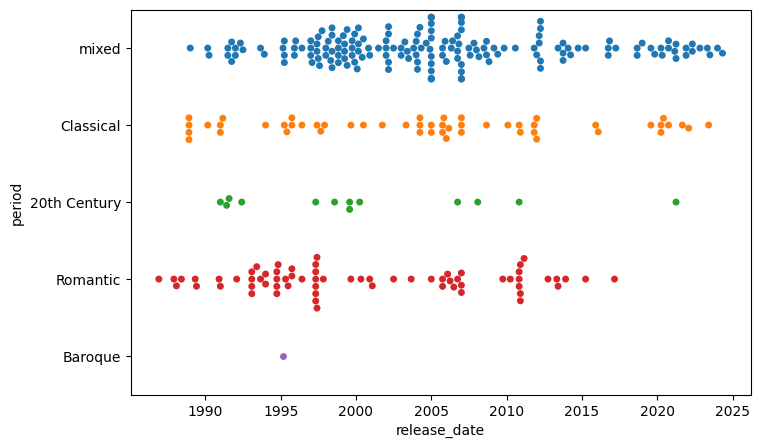

In [33]:
fig = plt.figure(figsize=(8,5))

sns.swarmplot(
    data=df.query('name == "Halász, Michael"'),
    x='release_date',
    y='period',
    hue='period',
    legend=False,
    #jitter=0.1
)

plt.show()

In [29]:
df["release_year"] = df["release_date"].dt.year
df["release_decade"] = df["release_year"] // 10 * 10
grouped = df.groupby(['release_decade', 'name', 'period']).size().reset_index(name='num_cont')
grouped.head()

,release_decade,name,period,num_cont
0,1980,"Gunzenhauser, Stephen",20th Century,2
1,1980,"Gunzenhauser, Stephen",Baroque,1
2,1980,"Gunzenhauser, Stephen",Classical,1
3,1980,"Gunzenhauser, Stephen",Romantic,5
4,1980,"Gunzenhauser, Stephen",mixed,4


In [30]:
df

,name,release_date,album_title,period,release_year,release_decade
0,"Halász, Michael",2024-05-01,"WAGNER, R.: Great Composers in Words and Music",mixed,2024,2020
1,"Wildner, Johannes",2024-03-01,"SCHUMANN, R.: Great Composers in Words and Music",mixed,2024,2020
2,"Halász, Michael",2024-01-01,"SCHUBERT, F.: Great Composers in Words and Music",mixed,2024,2020
3,"Wit, Antoni",2023-10-01,"PENDERECKI, K.: Symphony No. 6, ""Chinese Song...",Contemporary,2023,2020
4,"Wit, Antoni",2023-08-01,"NOSKOWSKI, Z.: Symphonies Nos. 1 and 2 (Rheinl...",mixed,2023,2020
...,...,...,...,...,...,...
1092,"Gunzenhauser, Stephen",1987-12-01,"RUBINSTEIN : Symphony No. 2, ""Ocean """,Romantic,1987,1980
1093,"Halász, Michael",1987-12-01,"RUBINSTEIN, Anton: Feramors / The Demon / Nero...",Romantic,1987,1980
1094,"Halász, Michael",1986-12-01,"GOLDMARK: Symphony No. 2, Op. 35 / Penthesilea...",Romantic,1986,1980
1095,"Gunzenhauser, Stephen",1985-12-01,"SCHUMANN, R.: Piano Concerto, Op. 54 / Introdu...",Romantic,1985,1980


In [38]:
top_conductors

['Halász, Michael',
 'Wildner, Johannes',
 'Gunzenhauser, Stephen',
 'Wit, Antoni']

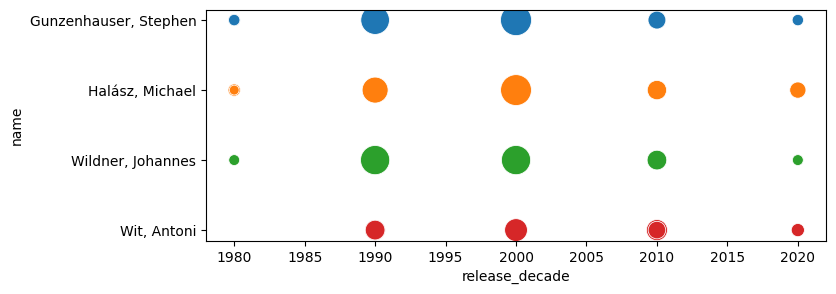

In [31]:
top_conductors = df.name.value_counts()[:5].index.to_list()


fig = plt.figure(figsize=(8,3))

sns.scatterplot(
    data=grouped.query('name in@top_conductors'),
    x='release_decade',
    y='name',
    hue='name',
    size='num_cont',
    sizes=(50, 500),
    legend=False
)
plt.show()

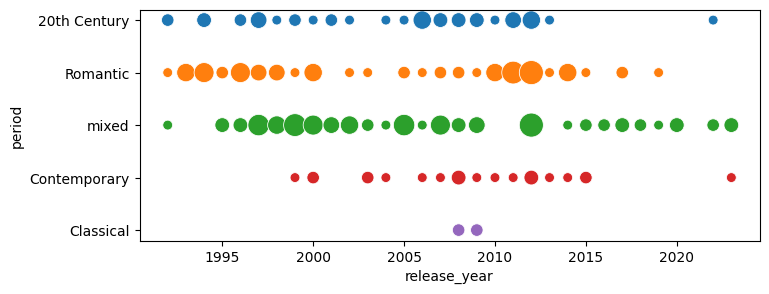

In [11]:
fig = plt.figure(figsize=(8,3))

sns.scatterplot(
    data=grouped.query('name == "Wit, Antoni"'),
    x='release_year',
    y='period',
    hue='period',
    size='num_cont',
    sizes=(50, 300),
    legend=False
)
plt.show()

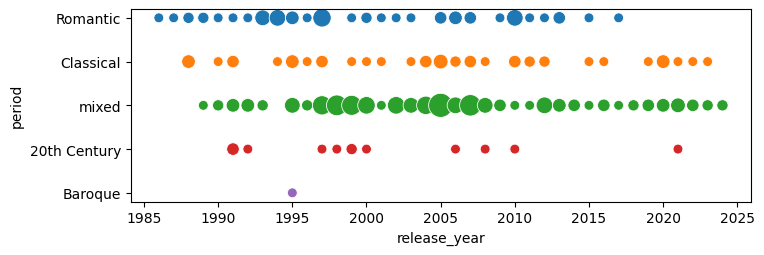

In [13]:
fig = plt.figure(figsize=(8,2.5))

sns.scatterplot(
    data=grouped.query('name == "Halász, Michael"'),
    x='release_year',
    y='period',
    hue='period',
    size='num_cont',
    sizes=(50, 300),
    legend=False
)
plt.show()